In [5]:
import os
os.getcwd()

#permission to access drive of linked account
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#uploading the dataset zip file to google colab drive
from google.colab import files
files.upload()

Mounted at /content/gdrive


Saving Medical Price Dataset.csv to Medical Price Dataset.csv


{'Medical Price Dataset.csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
#reading the file
df = pd.read_csv('Medical Price Dataset.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


This dataset has 1338 rows and 7 columns

In [7]:
print("Shape : ", df.shape)
print("Columns : ",df.columns)

Shape :  (1338, 7)
Columns :  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [8]:
features = df.iloc[:,0:6]
charges = df[['charges']]

In [9]:
features.shape

(1338, 6)

In [10]:
features.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [11]:
charges

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


**Data Pre-Processing**

In [12]:
#DATA CLEANING: There is no missing values in the dataset
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


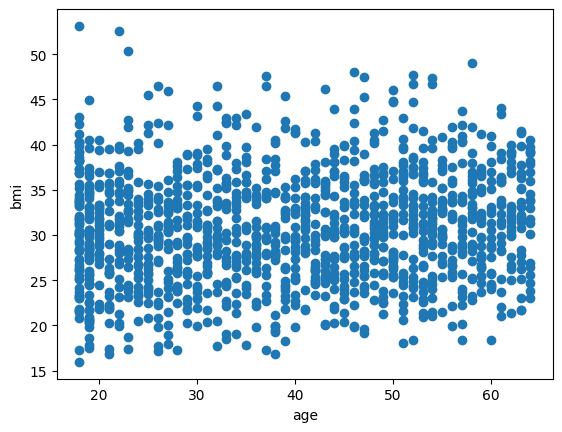

In [13]:
plt.scatter(features.age,features.bmi)
plt.xlabel('age')
plt.ylabel('bmi')
plt.show()

In [14]:
features.describe()

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
max,64.000000,53.130000,5.000000


In [15]:
#Display all the unique value in training dataset
for fea in list(features.columns):
  print(fea, " : ", features[fea].unique(),"\n\n")

age  :  [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39] 


sex  :  ['female' 'male'] 


bmi  :  [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3 

In [16]:
#applying Label Encoding on "Sex" Attribute
sex_dict = {'female':0, 'male':1}
features['sex'] = features['sex'].map(sex_dict)

#applying Label Encoding on "smoker" Attribute
smoker_dict = {'yes':1, 'no':0}
features['smoker'] = features['smoker'].map(smoker_dict)

#applying Label Encoding on "region" Attribute
region_dict = {'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}
features['region'] = features['region'].map(region_dict)

The pandas documentation describes qcut as a “Quantile-based discretization function.” This basically means that qcut tries to divide up the underlying data into equal sized bins. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins.

In [17]:
#Display all the unique value in training dataset after Label Encoding
for fea in list(features.columns):
  print(fea, " : ", features[fea].unique(),"\n\n")

age  :  [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39] 


sex  :  [0 1] 


bmi  :  [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.

In [18]:
#In the output all the featres are in numeric form.
#Now we can apply Standard Scaler
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 62.8 KB


**STANDARDIZE THE DATASET**

In [19]:
def StandardScaler(train):
  attributes = list(train.columns)
  mean=[]
  std = []
  #calculating the mean and standard deviation of each column
  for fea in attributes:
    mean.append(np.mean(train[fea]))
    std.append(np.std(train[fea]))

  print("mean : ",mean, "   deviation : ",std)
  #appling StandardScaler on each element of every column
  for i in range(len(attributes)):
    lis = []
    for x in train[attributes[i]]:
       lis.append((x-mean[i])/std[i])
    train[attributes[i]] = lis
    
  return train

X_scaled = StandardScaler(features)
X_scaled.insert(loc = 0, column = 'ones',value = np.ones((X_scaled.shape[0],1)))
print(X_scaled)

mean :  [39.20702541106129, 0.5052316890881914, 30.66339686098655, 1.0949177877429, 0.20478325859491778, 1.484304932735426]    deviation :  [14.044709038954522, 0.49997262868009534, 6.0959076415894256, 1.2050421724928497, 0.4035431520843401, 1.1044719546667197]
      ones       age       sex       bmi  children    smoker    region
0      1.0 -1.438764 -1.010519 -0.453320 -0.908614  1.970587 -1.343905
1      1.0 -1.509965  0.989591  0.509621 -0.078767 -0.507463 -0.438495
2      1.0 -0.797954  0.989591  0.383307  1.580926 -0.507463 -0.438495
3      1.0 -0.441948  0.989591 -1.305531 -0.908614 -0.507463  0.466915
4      1.0 -0.513149  0.989591 -0.292556 -0.908614 -0.507463  0.466915
...    ...       ...       ...       ...       ...       ...       ...
1333   1.0  0.768473  0.989591  0.050297  1.580926 -0.507463  0.466915
1334   1.0 -1.509965 -1.010519  0.206139 -0.908614 -0.507463  1.372326
1335   1.0 -1.509965 -1.010519  1.014878 -0.908614 -0.507463 -0.438495
1336   1.0 -1.296362 -1.0105

In [20]:
X_scaled

,ones,age,sex,bmi,children,smoker,region
0,1.0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,-1.343905
1,1.0,-1.509965,0.989591,0.509621,-0.078767,-0.507463,-0.438495
2,1.0,-0.797954,0.989591,0.383307,1.580926,-0.507463,-0.438495
3,1.0,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,0.466915
4,1.0,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,0.466915
...,...,...,...,...,...,...,...
1333,1.0,0.768473,0.989591,0.050297,1.580926,-0.507463,0.466915
1334,1.0,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,1.372326
1335,1.0,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,-0.438495
1336,1.0,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,-1.343905


**Splitting the dataset into training and testing set**

In [21]:
def train_test_split(train,target,train_size):
  size = round(train.shape[0] * train_size/100.0)
  xtrain = train[0:size]
  ytrain = target[0:size]
  xtest = train[size:target.shape[0]]
  ytest = target[size:target.shape[0]]

  xtrain = xtrain.to_numpy()
  ytrain = ytrain.squeeze()
  xtest = xtest.to_numpy()
  ytest = ytest.squeeze()

  return xtrain, xtest, ytrain, ytest


In [22]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled,charges,70)

In [23]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(937, 7)
(401, 7)
(937,)
(401,)


**Algorithm Multiple Linear Regression Model**

Y_pred = b0 + b1 x1 + b2 x2 + ... + bk xk

error/cost function (E) = (1/n) sum(Y_actual - Y_pred)


                        E = (Y - X B)^t * (Y - X B)
                        E = (Y^t - B^t X^t) * (Y - X B)
                        where there are total N errors and k beta values
                        E = (N*1) , B = (k*1) , X = (N*k)

                        For finding the best fit line
                        B^ = (X^t X)^-1 * X^t * Y

**Defining all function**

In [25]:
def LinearRegression(X,Y):
  A =  X.T.dot(X)
  B = np.linalg.inv(A)
  C = B.dot(X.T)
  D = C.dot(Y)
  return D

def predict(test,beta):
  return test.dot(beta)

#Performance Metrics Of Linear Regression

def mean_square_error(actual, pred):
  error= actual-pred
  square_error=np.power(error,2)
  sum_square_error=np.sum(square_error)
  mean_square_error=sum_square_error/len(pred)
  return mean_square_error

def rms_error(actual, pred):
  return np.sqrt(mean_square_error(actual, pred))


#r_2 calculated how much regression line is better than a mean line
#coefficient of determination
def r_square(actual,pred):
  #sum_square_residuals  (SSR)
  error= actual-pred
  square_error=np.power(error,2)
  sum_square_error=np.sum(square_error)

  #sum_square_total (SST)
  y_mean=np.mean(actual)
  total_variance=np.sum((actual-y_mean)**2)
  
  r_square = 1-(sum_square_error/total_variance)
  return r_square

**Model Fitting and Prediction**

In [26]:
beta = LinearRegression(x_train,y_train)
y_pred = predict(x_test,beta)
print(beta)
print("coefficients : b1,b2,b3,b4,b5,b6 - ", beta[1:7])
print('Intercept b0 : ', beta[0])
print(" Mean Square Error is : ", mean_square_error(y_test,y_pred))
print(" Root Mean Square Error is : ", rms_error(y_test,y_pred))
print(" r_square error is : ", r_square(y_test,y_pred))

[13132.67500949  3649.62264638  -190.83763234  2032.97110199
   530.31157851  9698.39148537   459.1875241 ]
coefficients : b1,b2,b3,b4,b5,b6 -  [3649.62264638 -190.83763234 2032.97110199  530.31157851 9698.39148537
  459.1875241 ]
Intercept b0 :  13132.675009493209
 Mean Square Error is :  40882763.8287847
 Root Mean Square Error is :  6393.963076901891
 r_square error is :  0.7277770191219346


**MODEL'S ACCURACY IS 72.77%**

**Model Visualization**

Text(0, 0.5, 'Charges')

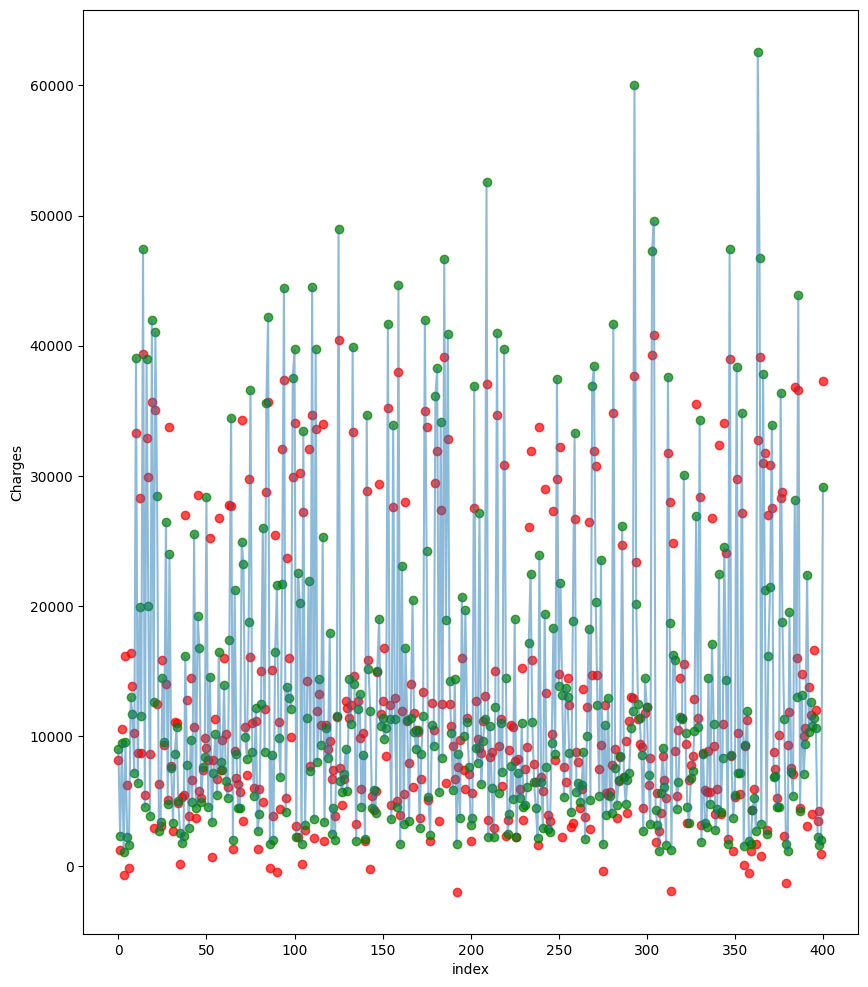

In [27]:
plt.figure(figsize=(10,12))
plt.plot(list(range(len(y_test))),y_test, alpha=0.5)
plt.scatter(list(range(len(y_test))),y_pred,color='red',alpha = 0.7)
plt.scatter(list(range(len(y_test))),y_test, color='green', alpha=0.7)
plt.xlabel('index')
plt.ylabel('Charges')

#Here blue color represents line plot of actual values 
#green color scatter plot of actual values
#red color scatter plot of predicted values